<a href="https://colab.research.google.com/github/Meenutomar/Python/blob/main/Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("Admission_Prediction.csv")

In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [ ]:
df['GRE Score'].unique()

array([337., 324.,  nan, 322., 314., 330., 321., 308., 302., 323., 325.,
       327., 307., 311., 317., 319., 318., 303., 312., 328., 336., 340.,
       298., 295., 310., 300., 338., 331., 320., 304., 316., 313., 332.,
       326., 329., 339., 334., 309., 315., 301., 296., 294., 299., 306.,
       305., 290., 335., 333., 297., 293.])

In [ ]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())

In [ ]:
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [ ]:
df['TOEFL Score'].unique()

array([118.       , 107.       , 104.       , 110.       , 103.       ,
       115.       , 109.       , 101.       , 102.       , 108.       ,
       106.       , 111.       , 112.       , 105.       , 114.       ,
       116.       , 119.       , 120.       ,  98.       ,  93.       ,
        99.       ,  97.       , 117.       , 113.       , 100.       ,
       107.1877551,  95.       ,  96.       ,  94.       ,  92.       ])

In [ ]:
df['University Rating'].unique()

array([ 4.,  3.,  2.,  5., nan,  1.])

In [ ]:
df['University Rating'].mode()

0    3.0
Name: University Rating, dtype: float64

In [ ]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [ ]:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

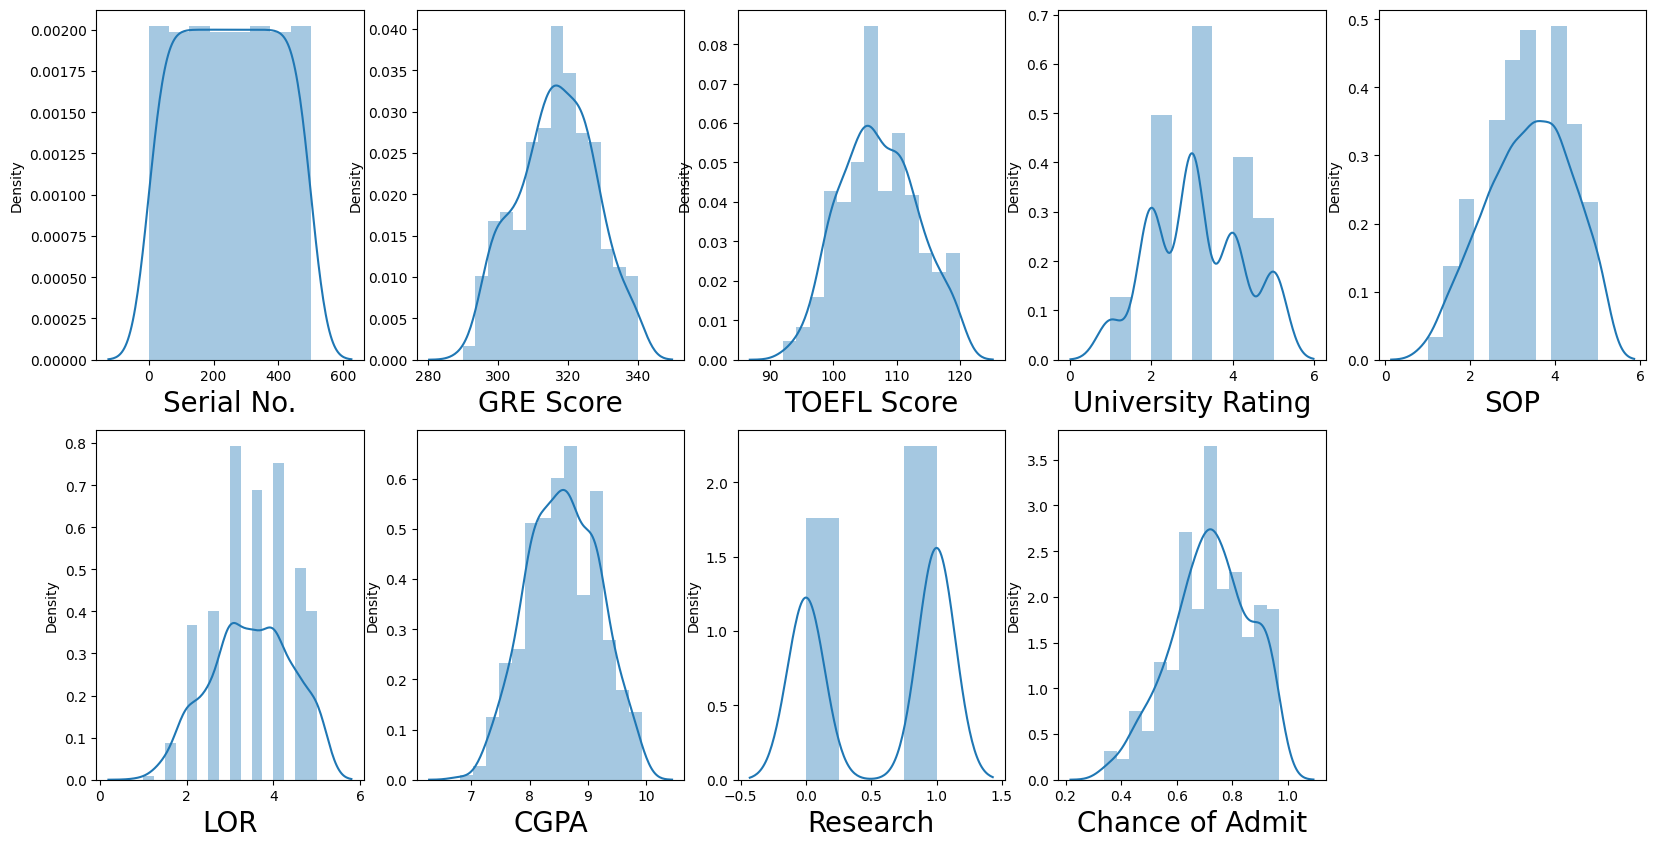

In [ ]:
plt.figure(figsize=(20,10))
plotnumber = 1
for column in df:
    if plotnumber <=10:
        ax = plt.subplot(2,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()


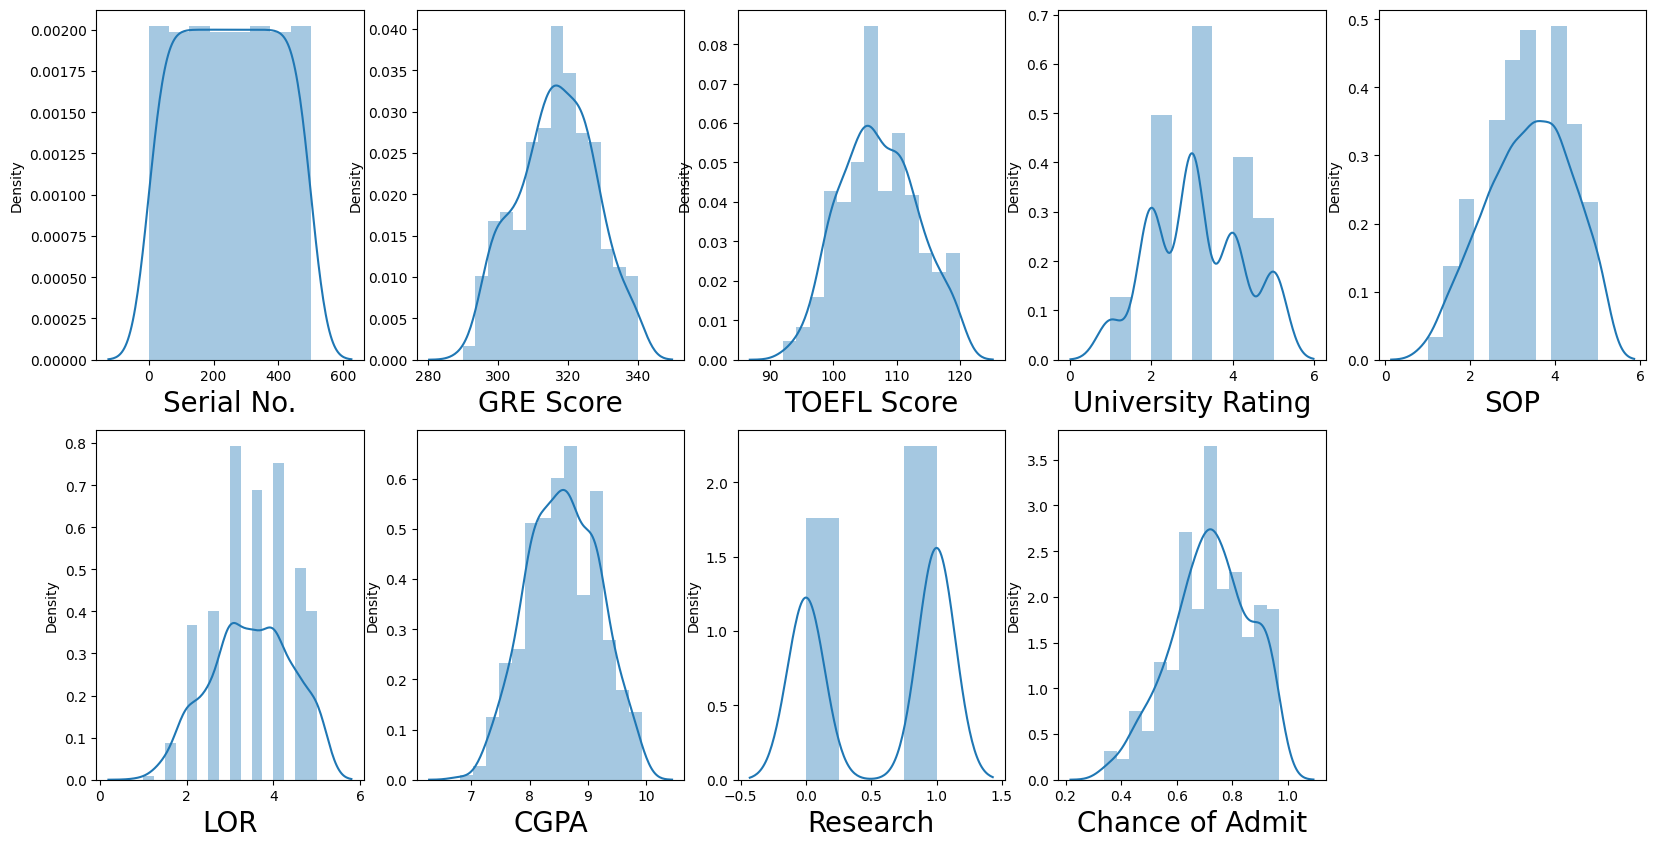

In [ ]:
plt.figure(figsize=(20,10))
plotnumber = 1
for column in df:
    if plotnumber <=10:
        ax = plt.subplot(2,5,plotnumber)

        sns.distplot(df[column])

        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

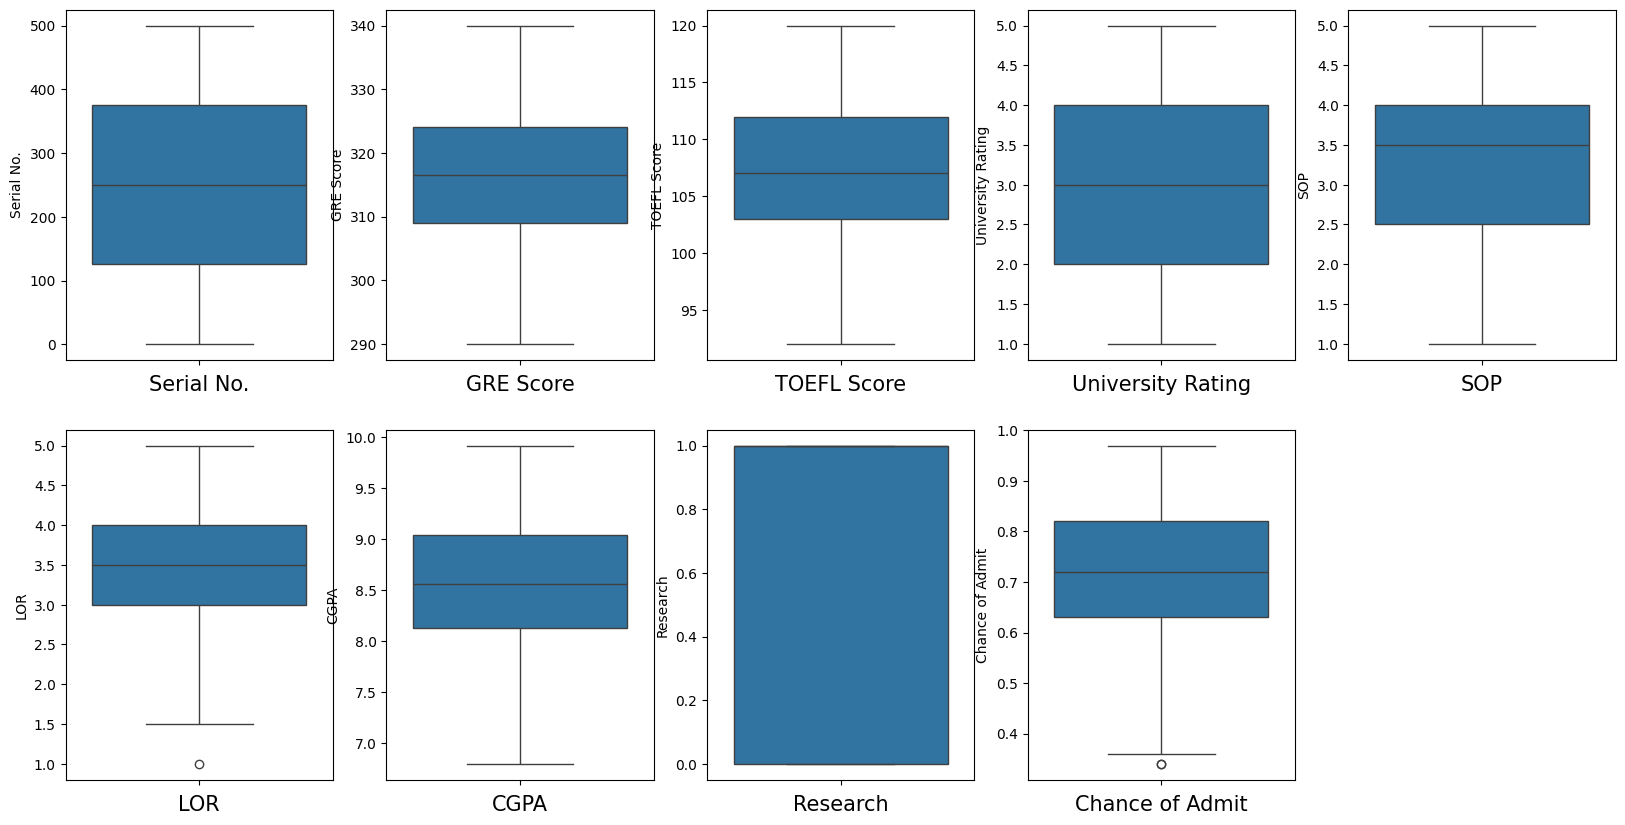

In [ ]:
plt.figure(figsize=(20,10))
plotnumber = 1
for column in df:
    if plotnumber <=10:
        ax = plt.subplot(2,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(columns='Chance of Admit')

y = df['Chance of Admit']

In [ ]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=20)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
lr.score(x_train,y_train)

0.8261170833555042

In [ ]:
lr.score(x_test,y_test)

0.8673273766729604

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
r2_score(y_test,lr_pred)

0.8673273766729604

In [ ]:
mean_absolute_error(y_test,lr_pred)

0.03562811876251345

In [ ]:
mean_squared_error(y_test,lr_pred)

0.0024559029304068295